In [3]:
from pydeseq2.dds import DeseqDataSet
from pydeseq2.default_inference import DefaultInference
from pydeseq2.ds import DeseqStats
import pandas as pd
import numpy as np
import scanpy as sc
#import os
#import glob
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
expr = pd.read_csv("/Users/peien/NYU Langone Health Dropbox/Peien Jiang/evolution/new_250522_JE2_timecourse/merged0r4r_139/sample_0r4r139_sum_counts_raw.csv",index_col=0).T
expr

,0r_0.1,0r_0.3,0r_0.9,4r_0.1,4r_0.3,4r_0.9
dnaA,600.0,1514.0,1504.0,1078.0,1141.0,1668.0
dnaN,439.0,1529.0,1945.0,1096.0,1372.0,1801.0
SAUSA300_RS00020,137.0,121.0,100.0,119.0,69.0,121.0
recF,1056.0,1176.0,1065.0,1288.0,1122.0,1404.0
gyrB,1890.0,4566.0,3305.0,2699.0,3295.0,3676.0
...,...,...,...,...,...,...
SAUSA300_RS15490,64.0,89.0,84.0,41.0,34.0,25.0
SAUSA300_RS15635,39.0,21.0,15.0,238.0,29.0,11.0
SAUSA300_RS15735,23.0,93.0,352.0,19.0,2.0,3.0
SAUSA300_RS15740,16.0,65.0,254.0,14.0,7.0,0.0


In [3]:
metadata = pd.DataFrame({'condition': ['0r_0.1', '0r_0.3', '0r_0.9', '4r_0.1', '4r_0.3', '4r_0.9']},
                       index=['0r_0.1', '0r_0.3', '0r_0.9', '4r_0.1', '4r_0.3', '4r_0.9'])
metadata

,condition
0r_0.1,0r_0.1
0r_0.3,0r_0.3
0r_0.9,0r_0.9
4r_0.1,4r_0.1
4r_0.3,4r_0.3
4r_0.9,4r_0.9


In [4]:
inference = DefaultInference(n_cpus=8)
dds = DeseqDataSet(
    counts=expr.transpose(),
    metadata=metadata,
    design_factors="condition",
    refit_cooks=True,
    inference=inference,
    # n_cpus=8, # n_cpus can be specified here or in the inference object
)
dds

/Users/peien/opt/anaconda3/envs/pydeseq2/lib/python3.8/site-packages/pydeseq2/dds.py:250: UserWarning: Some factor levels in the design contain underscores ('_').
                    They will be converted to hyphens ('-').
  self.obsm["design_matrix"] = build_design_matrix(


AnnData object with n_obs × n_vars = 6 × 2284
    obs: 'condition'
    obsm: 'design_matrix'

In [5]:
dds.fit_size_factors()

dds.obsm["size_factors"]

Fitting size factors...
... done in 0.01 seconds.



array([0.6325333 , 1.04349839, 0.88002868, 2.15206941, 0.90579555,
       0.90754392])

In [6]:
dds.deseq2() #It's able to get the size factor and normalized counts although with an error

Fitting size factors...
... done in 0.01 seconds.



ValueError: The number of samples and the number of design variables are equal, i.e., there are no replicates to estimate the dispersion. Please use a design with fewer variables.

In [7]:
dds

AnnData object with n_obs × n_vars = 6 × 2284
    obs: 'condition'
    obsm: 'design_matrix', 'size_factors'
    varm: 'non_zero'
    layers: 'normed_counts'

In [4]:
exp_avg = pd.DataFrame(dds.layers['normed_counts'], 
                       index=['0r_0.1', '0r_0.3', '0r_0.9', '4r_0.1', '4r_0.3', '4r_0.9'],
                      columns=expr.index)
exp_avg

NameError: name 'dds' is not defined

In [10]:
pwd

'/'

In [11]:
exp_avg.to_csv("/Users/peien/NYU Langone Health Dropbox/Peien Jiang/evolution/new_250522_JE2_timecourse/merged0r4r_139/deseq2_0r4r139.csv")

In [19]:
exp = pd.read_csv("/Users/peien/NYU Langone Health Dropbox/Peien Jiang/evolution/new_250522_JE2_timecourse/merged0r4r_139/deseq2_0r4r139.csv", index_col=0)
exp

,dnaA,dnaN,SAUSA300_RS00020,recF,gyrB,gyrA,nnrD,hutH,serS,SAUSA300_RS00055,...,tmRNA,SAUSA300_RS15260,SAUSA300_RS15340,SAUSA300_RS15370,epiG,SAUSA300_RS15490,SAUSA300_RS15635,SAUSA300_RS15735,SAUSA300_RS15740,SAUSA300_RS15795
0r_0.1,948.566654,694.034602,216.589386,1669.477310,2987.984959,2344.540579,1625.210867,91.694777,687.710824,28.457000,...,24128.373781,147.027831,11188.343680,3308.916677,94.856665,101.180443,61.656832,36.361722,25.295111,44.266444
0r_0.3,1450.888679,1465.263402,115.956097,1126.978261,4375.665594,4992.820355,259.703324,49.832372,1140.394669,27.791131,...,13251.577711,139.913968,10656.461104,866.316622,34.499335,85.290021,20.124612,89.123281,62.290465,28.749445
0r_0.9,1709.035215,2210.155249,113.632661,1210.187835,3755.559433,4841.887668,146.586132,45.453064,1218.142122,93.178782,...,9149.701832,88.633475,9768.999832,2157.884225,54.543677,95.451435,17.044899,399.986965,288.626958,37.498778
4r_0.1,500.913211,509.277254,55.295614,598.493707,1254.141705,1269.011114,1841.483355,96.186489,309.004903,36.708853,...,4272.167037,33.920839,3505.463142,1113.811659,128.713321,19.051430,110.591229,8.828712,6.505366,20.910106
4r_0.3,1259.666152,1514.690588,76.176130,1238.690116,3637.686215,4606.999871,229.632392,52.992091,781.633335,55.200094,...,6451.787023,57.408098,5822.505948,417.312713,50.784087,37.536064,32.016055,2.208004,7.728013,27.600047
4r_0.9,1837.927574,1984.476954,133.326880,1547.032562,4050.492662,3977.768909,114.595005,19.833751,1066.615043,159.771881,...,6083.452118,19.833751,5373.844590,1645.099441,60.603127,27.546876,12.120625,3.305625,0.000000,18.731876


In [20]:
exp_logscaled = np.log2(exp+1).apply(lambda x: (x - np.mean(x)) / np.std(x), 0)
exp_logscaled

,dnaA,dnaN,SAUSA300_RS00020,recF,gyrB,gyrA,nnrD,hutH,serS,SAUSA300_RS00055,...,tmRNA,SAUSA300_RS15260,SAUSA300_RS15340,SAUSA300_RS15370,epiG,SAUSA300_RS15490,SAUSA300_RS15635,SAUSA300_RS15735,SAUSA300_RS15740,SAUSA300_RS15795
0r_0.1,-0.500252,-1.057415,1.619872,1.063513,-0.095850,-0.691803,1.314224,1.067719,-0.301332,-0.984511,...,1.757447,1.138265,1.068758,1.407349,0.904193,1.070461,0.888735,0.261924,0.219457,1.491352
0r_0.3,0.465545,0.325778,0.159798,-0.122162,0.806398,0.822840,-0.344515,-0.106569,0.780557,-1.020726,...,0.703708,1.069423,0.954404,-0.604274,-1.444515,0.806032,-0.575654,0.774964,0.711940,0.044950
0r_0.9,0.837768,1.086935,0.112605,0.092744,0.444926,0.761327,-0.860063,-0.282662,0.921679,0.856418,...,0.052439,0.437036,0.750254,0.765487,-0.386053,0.980193,-0.787892,1.644713,1.564671,0.933338
4r_0.1,-1.950440,-1.629968,-1.559856,-2.030730,-2.148718,-1.921439,1.427362,1.160211,-2.010805,-0.593342,...,-1.286589,-0.880578,-1.655829,-0.227211,1.619376,-1.477116,1.666121,-0.516108,-0.483517,-1.008998
4r_0.3,0.144325,0.387208,-0.817899,0.162976,0.369498,0.661677,-0.455566,0.011302,-0.027548,0.038678,...,-0.561825,-0.161599,-0.464668,-1.699513,-0.551770,-0.455084,0.025808,-1.168475,-0.398897,-0.090823
4r_0.9,1.003054,0.887462,0.485481,0.833660,0.623746,0.367398,-1.081442,-1.850001,0.637449,1.703483,...,-0.665180,-1.602547,-0.652919,0.358163,-0.141231,-0.924486,-1.217117,-0.997018,-1.613654,-1.369819


In [17]:
markers = ['agrC', 'agrB', 'atl','fruA','ldh1',
           'carB','carA','pyrC','pyrF','pyrE','pyrB','pyrP',
           'ssaA','isaA','ausA','sdrM','cydA','recD2','smpB','lmrS',
           'hrcA','grpE','groEL','groES','dnaK','dnaJ','clpB','mcsA','mcsB','clpC','prmA',
           'pbuX','guaB','guaA','hchA','dtpT','fdhA','qoxB']

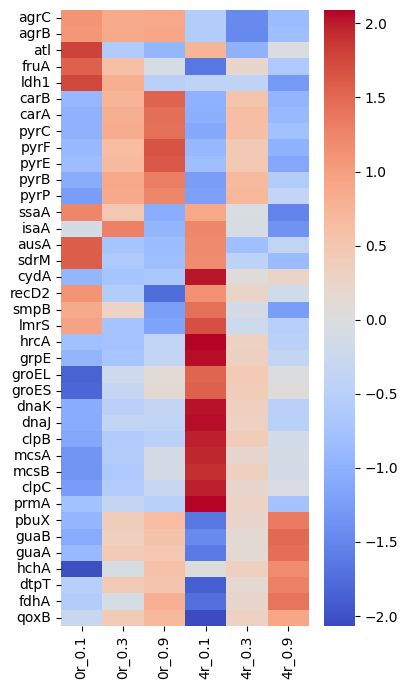

In [23]:
plt.figure(figsize=(4,8))
sns.heatmap(exp_logscaled[markers].T, cmap='coolwarm')
plt.savefig("deseq2_0r4r139_marker_heatmap.pdf")